In [1]:
# Download the Dataset
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-08-02 18:17:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)...67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443...connected.
HTTP request sent, awaiting response...200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   110KB/s    in 0.6s    

2020-08-02 18:17:38 (110 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [2]:
# Read the Dataset
import pandas as pd
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
# Data Exploration
df.describe()
#df.columns

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# Select Some Features 
cdf=df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb5c06c130>,
      dtype=object)

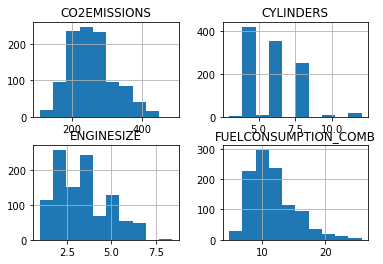

In [6]:
# Histogram of Each Property
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()

Text(0, 0.5, 'Emission')

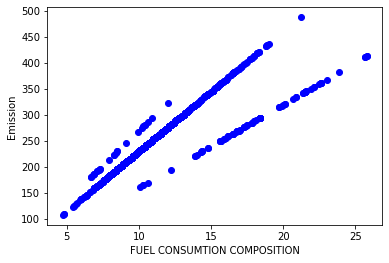

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUEL CONSUMTION COMPOSITION')
plt.ylabel('Emission')

Text(0, 0.5, 'Emission')

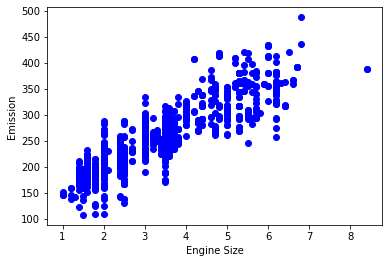

In [9]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

Text(0, 0.5, 'Emission')

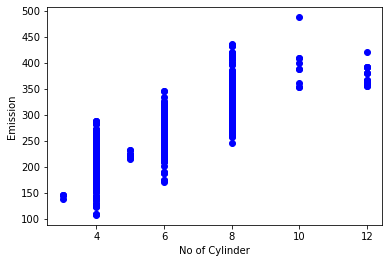

In [10]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('No of Cylinder')
plt.ylabel('Emission')

In [11]:
# Train and Test Data Split
import numpy as np
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

In [14]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
...,...,...,...,...
1060,3.0,6,11.5,264
1062,3.0,6,11.8,271
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


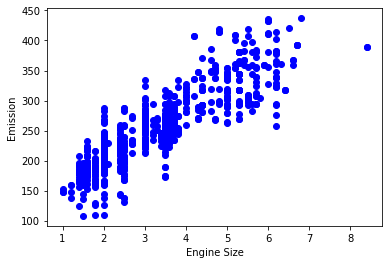

In [16]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [17]:
# Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The Coefficients
print('Coefficients :',regr.coef_)
print('Intercept :',regr.intercept_)

Coefficients : [[38.92516128]]
Intercept : [125.91181834]


Text(0, 0.5, 'Emission')

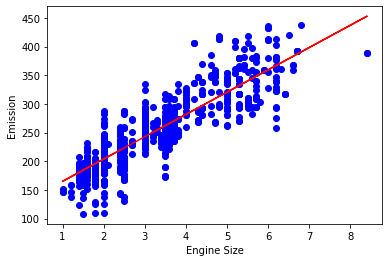

In [22]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [23]:
# Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print('Mean Absolute Error : %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print("Residual Sum of Squares(MSE): %.2F" %np.mean((test_y_ - test_y)**2))
print("R2 Score : %.2f" %r2_score(test_y_ , test_y))

Mean Absolute Error : 22.52
Residual Sum of Squares(MSE): 854.59
R2 Score : 0.73
